In [47]:
import matplotlib.pyplot as pyp
import scipy.stats as st
import pandas as p
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
def read_dataset(path, separ, en):
    return p.read_csv(path, sep = separ, encoding = en)

dataset = read_dataset("fullDataset.csv", ',', 'cp1252')
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  139483 non-null  int64  
 1   ID          139483 non-null  int64  
 2   Sex         139483 non-null  object 
 3   Age         139483 non-null  int64  
 4   Height      139483 non-null  int64  
 5   Weight      139483 non-null  int64  
 6   Team        139483 non-null  object 
 7   Year        139483 non-null  int64  
 8   Season      139483 non-null  object 
 9   Sport       139483 non-null  object 
 10  Medal       18968 non-null   object 
 11  Code        139483 non-null  object 
 12  GDP         139483 non-null  float64
 13  Population  139483 non-null  float64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.7+ MB


,Unnamed: 0,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal,Code,GDP,Population
0,0,1,M,24,180,80,China,1992,Summer,Basketball,NaN,CHN,4.269157e+11,1.164970e+09
1,1,2,M,23,170,60,China,2012,Summer,Judo,NaN,CHN,8.532230e+12,1.350695e+09
2,2,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
3,3,5,F,21,185,82,Netherlands,1988,Winter,Speed Skating,NaN,NLD,2.619105e+11,1.476009e+07
4,4,5,F,25,185,82,Netherlands,1992,Winter,Speed Skating,NaN,NLD,3.629629e+11,1.518417e+07


In [49]:
drop_list = ["Unnamed: 0", "ID", "Sex", "Age", "Height", "Weight", "Team", "Sport"]

for str in drop_list:
    dataset = dataset.drop(str, axis = 1)

dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139483 entries, 0 to 139482
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        139483 non-null  int64  
 1   Season      139483 non-null  object 
 2   Medal       18968 non-null   object 
 3   Code        139483 non-null  object 
 4   GDP         139483 non-null  float64
 5   Population  139483 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ MB


,Year,Season,Medal,Code,GDP,Population
0,1992,Summer,NaN,CHN,4.269157e+11,1.164970e+09
1,2012,Summer,NaN,CHN,8.532230e+12,1.350695e+09
2,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07
3,1988,Winter,NaN,NLD,2.619105e+11,1.476009e+07
4,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07
5,1992,Winter,NaN,NLD,3.629629e+11,1.518417e+07
6,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07
7,1994,Winter,NaN,NLD,3.791303e+11,1.538284e+07
8,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08
9,1992,Winter,NaN,USA,6.520327e+12,2.565140e+08


In [50]:
dataset = dataset.groupby(["Year", "Season", "Code"]).agg(GDP = ("GDP", "mean"),
                                                          Population = ("Population", "mean"),
                                                          Medal = ("Medal", "count"))
dataset.info()
dataset.head(10)
dataset.to_csv("check_r.csv", sep=',', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2258 entries, (1980, 'Summer', 'AFG') to (2016, 'Summer', 'ZWE')
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GDP         2258 non-null   float64
 1   Population  2258 non-null   float64
 2   Medal       2258 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 62.7+ KB


In [51]:
def kolm_smirn_check(dFrame, column):
    ks_statistic, p_value = st.kstest(dFrame[column], 'norm')
    if p_value > 0.05: return True
    return False

def pearson_check(dFrame, column):
    statistic, p_value = st.normaltest(dFrame[column])
    if p_value > 0.05: return True
    return False

print("#1 test - Kolmagorov-Smirnov test,\n#2 test - Pearson test\n")
for c in dataset.columns:
    print('{0:<15}'.format(c + ":"),f"#1 test - {kolm_smirn_check(dataset, c)}, #2 test - {pearson_check(dataset, c)};")

#1 test - Kolmagorov-Smirnov test,
#2 test - Pearson test

GDP:            #1 test - False, #2 test - False;
Population:     #1 test - False, #2 test - False;
Medal:          #1 test - False, #2 test - False;


In [52]:
dataset.corr()

,GDP,Population,Medal
GDP,1.000000,0.366452,0.612213
Population,0.366452,1.000000,0.243602
Medal,0.612213,0.243602,1.000000


In [53]:
first = dataset.iloc[:, :2]
second = dataset['Medal']
f_train, f_test, s_train, s_test = train_test_split(first, second, test_size=0.3, random_state = 10)

In [54]:
par = ["GDP", "Population", ["GDP", "Population"]]

lin = []
pol = []
for i in range(len(par)):
    pol.append(make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()))
    if i < 2: 
        lin.append(LinearRegression().fit(f_train, s_train))
        pol[i].fit(f_train, s_train)
    else:
        lin.append(LinearRegression().fit(f_train, s_train))
        pol[i].fit(f_train, s_train)

In [55]:
prediction = []

def predict_by(prediction, s):
    for i in range(len(par)):
        if i < 2:
            prediction.append(s[i].predict(f_test))
        else:
            prediction.append(s[i].predict(f_test))
    return prediction

prediction = predict_by(prediction, lin)
prediction = predict_by(prediction, pol)

In [58]:
min_i = n.sum((n.array(prediction) - s_test.to_numpy())**2,axis = 1).argmin()

print("Best model is:")
if (min_i < 3):
    print(f"linear model by {par[min_i]} params")
else:
    print(f"polynomial model by {par[min_i - 4]} params")

Best model is:
polynomial model by ['GDP', 'Population'] params


<ipython-input-67-a5f017300623>:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
c:\Users\admin\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X 

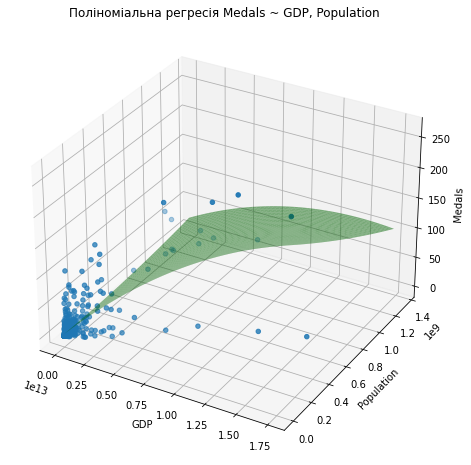

In [67]:
from mpl_toolkits.mplot3d import Axes3D

params = ['GDP', 'Population']
params_values = []

for i in range(len(params)):
    values = n.linspace(f_test[params[i]].min(), f_test[params[i]].max()).reshape(-1, 1)
    params_values.append(values)


fig = pyp.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

X_3d = params_values[0]
Y_3d = params_values[1]

XX, YY = n.meshgrid(X_3d, Y_3d)

Z = []
for i in range(len(Y_3d)):
    temp = []
    for j in range(len(X_3d)):
        temp.append(pol[2].predict(n.array([X_3d[j], Y_3d[i]]).T)[0])
    Z.append(temp)
    
Z = n.array(Z)

ax.set_title('Поліноміальна регресія Medals ~ GDP, Population')
ax.set_xlabel('GDP')
ax.set_ylabel('Population')
ax.set_zlabel('Medals')
ax.plot_surface(
    XX, YY,
    n.array(Z),
    color='green',
    alpha=0.5
)
ax.scatter(f_test['GDP'], f_test['Population'], s_test)
pyp.show()

In [72]:
arr = pol[2].predict(f_test)
sum = 0
count = 0
for i in arr:
    print(i)
    count += 1
    sum += i

print(f"avg {sum / count}")

3.173862779828364
3.8093644260454687
6.616861911797237
4.290871044762706
3.965378501481606
20.535569196253615
3.2064052755416452
3.209110495211918
3.352033584869428
3.060385989503954
3.2081783066646175
12.772680539484146
3.137687831161382
3.175818531634797
13.246688401849372
3.737890548687682
3.0669539251494418
3.140016291467398
37.46368266204587
3.11974442102492
3.0718621487039948
3.4838849518853565
3.1249228694833424
3.8888335694030745
3.88572686017823
5.44564605081864
3.071319347781677
7.920485304049518
3.370242289374865
3.0563284211465804
3.112202597151607
3.1406816885671986
3.1413541914058163
3.1217313165127476
3.444802812147902
4.043703674100545
3.095067158173152
9.425320573306768
3.091487786692127
9.936012413034783
3.4653503958859653
26.503232190578434
3.140866853178996
3.4564166839877206
4.277840238738138
3.080751420047949
3.0893455067404347
3.0716656458210743
3.091959336515039
3.402658423050962
5.865036962920943
10.139668321562638
29.382433478284312
3.1366726268810483
34.65915